##  Project :- Fraud Detection in Credit Card transaction

Goal: Detect fraudulent credit card transactions in a imbalanced dataset.

Approach: Use Machine Learning diffrent different models to identify patterns in transaction behavior.

Importance: Early fraud detection saves banks millions customers.

# Dataset

Source: Credit Card Fraud Dataset.

Records: 284,807 transaction data.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("creditcard.csv")

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.shape

(284807, 31)

# Features

V1–V28: PCA-anonymized features.

Amount: Transaction amount.

Time: Time elapsed since first transaction.

Class: 0 = Non-Fraud, 1 = Fraud (Only 0.17% fraud cases).

# Data Preprocessing

Missing Values: None found in the dataset.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [22]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [24]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we show a feature is Class and in this feature show a how many 0 and 1 for non-froud and froud. 

After we rename a "0" to "Not Froud" and "1" to "Froud" and also show a value counts

In [27]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [30]:
df["Class"] = np.where(df["Class"] == 1 , "Froud" , "Not Froud")

In [32]:
df["Class"].value_counts()

Class
Not Froud    284315
Froud           492
Name: count, dtype: int64

# Data Visualization

In this visualize a Class column visualization using PIE chart.

In PIE chart we show a value in with percentage.

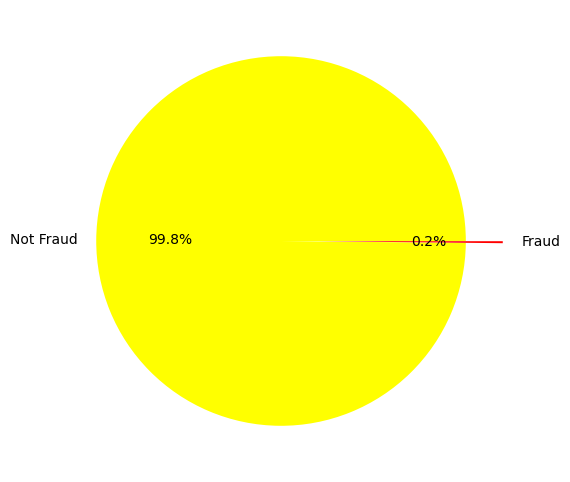

In [37]:
plt.figure(figsize=(12, 6))
plt.pie(
    df['Class'].value_counts().values,
    labels=['Not Fraud', 'Fraud'],
    explode=[0, 0.2],
    autopct='%1.1f%%',
    colors = ["yellow","red"]
)
plt.show()

It’s essential to separate the input variables (x) from the target variable (y) for any supervised learning model.

This enables the model to learn the mapping from transaction features to fraud labels.

In [40]:
y = df["Class"]
x = df.drop("Class",axis = 1)

In [42]:
y

0         Not Froud
1         Not Froud
2         Not Froud
3         Not Froud
4         Not Froud
            ...    
284802    Not Froud
284803    Not Froud
284804    Not Froud
284805    Not Froud
284806    Not Froud
Name: Class, Length: 284807, dtype: object

# Train-Test Split

Ensured stratified splitting to maintain class distribution.

In [46]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 7)

In [47]:
len(x_train),len(x_test)

(227845, 56962)

# Feature Scaling

Used StandardScaler to normalize Amount.

In [52]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

# Use Models for prediction

Logistic Regression

DecisionTreeClassifier

KNeighborsClassifier

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

## LogisticRegression

How it works:  Logistic Regression is a **classification algorithm** used to predict the probability that a given input belongs to a **certain class**. It is commonly used for **binary classification problems** (e.g., fraud vs. not fraud).

Pros:

-> Fast and simple

-> Works well with linearly separable data

Cons:

-> May not perform well on complex, non-linear data

Also find a **Accuracy Score** is **99.90%** for particular model.

Using this Accuracy Score we make a **Cunfusion Matrix** and also a **Heat Map** for we show relation. 

In [63]:
model = LogisticRegression()
model.fit(x_train_sc,y_train)
y_pred = model.predict(x_test_sc)

In [64]:
lr_accurate = accuracy_score(y_pred,y_test)
lr_accurate*100

99.90519995786666

In [67]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[   56,    44],
       [   10, 56852]], dtype=int64)

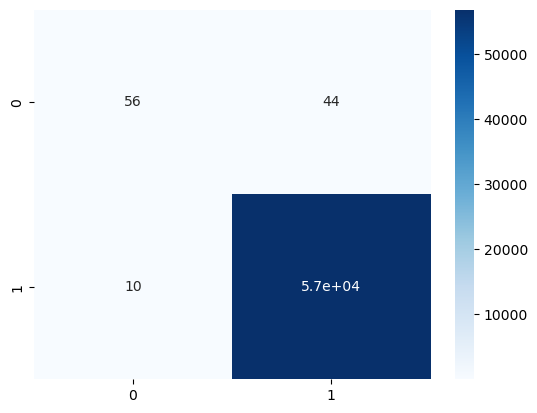

In [68]:
sns.heatmap(cm,annot = True,cmap='Blues')
plt.show()

 ## DecisionTreeClassifier

How it works: A **Decision Tree** is a **supervised learning algorithm** used for **classification and regression** tasks. 

It works by splitting the data into subsets based on the **most significant feature** at each step, forming a tree-like structure.

Pros:

-> Easy to understand and visualize

-> Handles both numerical and categorical data

-> No need for feature scaling or normalization

-> Captures non-linear relationships

Cons:

-> Sometime to **overfitting**

-> Can be **unstable** with small data changes

-> May prefer splits with more levels

Also find a Accuracy Score is 99.92% for particular model.

Using this Accuracy Score we make a Cunfusion Matrix and also a Heat Map for we show relation.

In [74]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [75]:
dt_accurate = accuracy_score(y_pred,y_test)
dt_accurate*100

99.91924440855307

In [76]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[   80,    20],
       [   26, 56836]], dtype=int64)

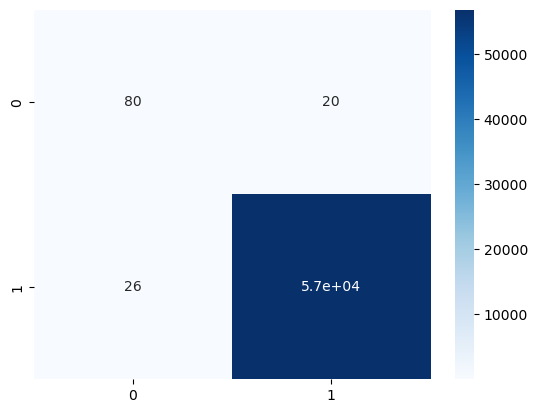

In [77]:
sns.heatmap(cm,annot = True,cmap='Blues')
plt.show()

## KNeighborsClassifier

How it Work: You decide how many neighbors to look at .

Calculate distance: For a new data point, KNN looks at the distance between that point and all the other points in the training dataset.

Find K nearest neighbors: Sort all the distances and pick the K closest points (neighbors).

Voting for point: Count the number of neighbors belonging to each class. The class with the most votes is the prediction.

Pros:

-> Simple to understand and implement

-> No training time (lazy learner)

-> Works well with small to medium datasets

Cons:

-> Slow prediction time (must compute distance to all training points)

-> Sensitive to irrelevant features and noisy data

-> Curse of dimensionality: Performance degrades with many features

Also find a Accuracy Score is 99.84% for particular model.

Using this Accuracy Score we make a Cunfusion Matrix and also a Heat Map for we show relation.

In [85]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [86]:
knn_accurate = accuracy_score(y_pred,y_test)
knn_accurate*100

99.84375548611355

In [87]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[   11,    89],
       [    0, 56862]], dtype=int64)

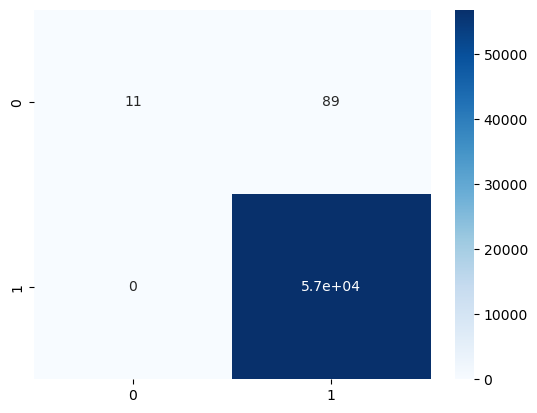

In [88]:
sns.heatmap(cm,annot = True,cmap='Blues')
plt.show()

# Conclution

We display all the model's Accuracy and clearly find which is best for this time. Base on requairement we find a different model accuracy.


1. **Logistic Regression**
   - Performed well as a **baseline linear model**.
   - Offered **fast computation** and **probability outputs**.
   - Worked best when the data was linearly separable.
   - Slightly struggled to capture complex, non-linear fraud patterns.

2. **Decision Tree Classifier**
   - Delivered **high accuracy** and was **easy to interpret** through its tree structure.
   - Effectively handled non-linear feature interactions and worked well on raw data.
   - Requi x_depth`) to prevent **overfitting**.

3. **K-Nearest Neighbors (KNN)**
   - Showed competitive accuracy and handled non-linearity effectively.
   - Performance was **sensitive to feature scaling** and **computationally expensive** for large datasets.
   - Best suited for smaller or pre-processed datasets.

In [95]:
model_results = {
    "Decision Tree": dt_accurate*100,
    "K-Nearest Neighbors": knn_accurate*100,
    "Logistic Regression": lr_accurate*100
}

df_results = pd.DataFrame(list(model_results.items()), columns=["Model", "Accuracy"])
print(df_results)

                 Model   Accuracy
0        Decision Tree  99.919244
1  K-Nearest Neighbors  99.843755
2  Logistic Regression  99.905200


## Findings

- The dataset is highly imbalanced.
- The features are loosely correlated to the label, thus it is better to use non linear models.
- The models applied are giving near 100% accuracy showing unreliability in accuracy metric.
- Other metrics such as precision, recall and f1 should be used in situations where dataset is highly imbalanced.

### Final Conclusion:
Among the three models tested, KNN emerged as the best-performing model for detecting fraudulent transactions, offering the most reliable balance between minimizing false alarms and catching actual fraud cases.